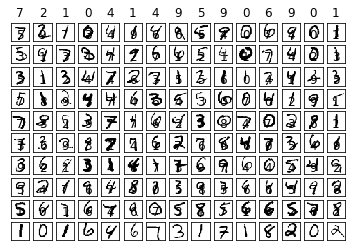

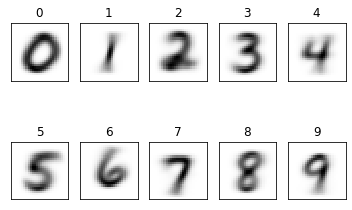

In [1]:

import matplotlib.pyplot as plt
import numpy as np

file_data   = "mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1

#
# plot first 150 images out of 10,000 with their labels
#
f1 = plt.figure(1)

for i in range(150):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)


#plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_image):

    im_average[:, list_label[i]] += list_image[:, i]
    im_count[list_label[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]

    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

In [175]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

print('Defined sigmoid function!')

Defined sigmoid function!


In [199]:
col_train_j = []
col_test_j = []
col_train_acc = []
col_test_acc = []

w = np.random.normal(0,1,[785,10])

for iteration in range(300):
    sum_train_j = 0
    sum_test_j = 0
    sum_train_acc = 0
    sum_test_acc = 0
    
    # Train
    for xx in range(0,6000):
    
        input_v = np.append(list_image[:,xx],1)
        input_l = list_label[xx]
        
        h_ = input_v.dot(w)
        h = sigmoid(h_)
        
        output_l = np.zeros(10)
        output_l[np.argmax(h)] = 1
        
        actual_l = np.zeros(10)
        actual_l[input_l] = 1
        
        dE_dh = actual_l - output_l
        
        if np.sum(dE_dh**2) == 0:
            sum_train_acc += 1

        sum_train_j += np.sum(dE_dh**2)/2
        
        dE_dh = np.reshape(dE_dh, (-1, len(dE_dh)))
        input_v = np.reshape(input_v, (-1, len(input_v)))
        
        w = w + 0.01*np.transpose(input_v).dot(dE_dh)
    
    # Test
    for xx in range(6000,10000):
    
        input_v = np.append(list_image[:,xx],1)
        input_l = list_label[xx]
        
        h_ = input_v.dot(w)
        h = sigmoid(h_)
        
        output_l = np.zeros(10)
        output_l[np.argmax(h)] = 1
        
        actual_l = np.zeros(10)
        actual_l[input_l] = 1
        
        dE_dh = actual_l - output_l
        if np.sum(dE_dh**2) == 0:
            sum_test_acc += 1

        sum_test_j += np.sum(dE_dh**2)/2

    col_train_j.append(sum_train_j)
    col_test_j.append(sum_test_j)
    col_train_acc.append(sum_train_acc/6000)
    col_test_acc.append(sum_test_acc/4000)
# print(np.transpose(input_v).dot(dE_dh))

print('Trained!')

Trained!


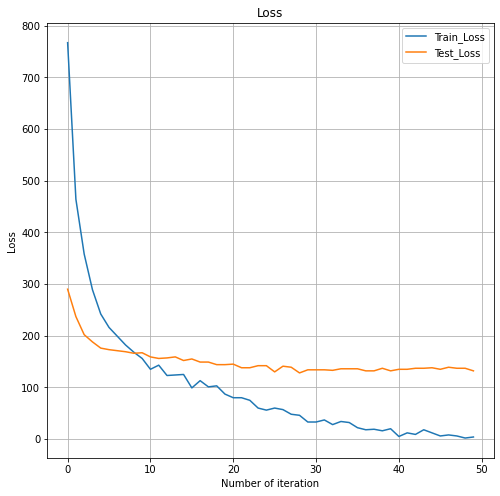

In [189]:
plt.figure(figsize=(8,8))
plt.plot(col_train_j)
plt.plot(col_test_j)
plt.title('Loss')
plt.legend(['Train_Loss','Test_Loss'])
plt.ylabel('Loss')
plt.xlabel('Number of iteration')

plt.grid()
plt.show()



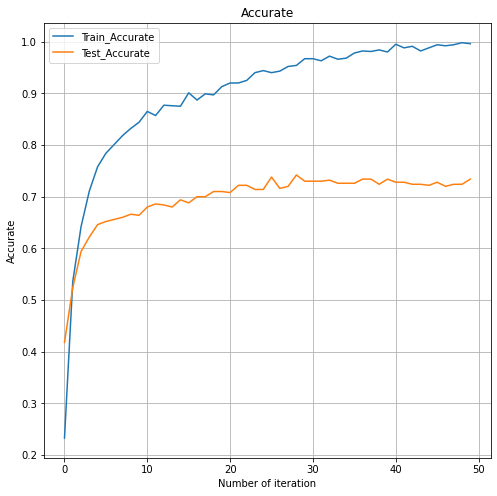


	 Training Accurate: 0.9960  Testing Accurate: 0.7340


In [198]:
plt.figure(figsize=(8,8))
plt.plot(col_train_acc)
plt.plot(col_test_acc)
plt.grid()
plt.title('Accurate')
plt.legend(['Train_Accurate','Test_Accurate'])
plt.ylabel('Accurate')
plt.xlabel('Number of iteration')

plt.show()

print()
print('\t Training Accurate: %.4f  Testing Accurate: %.4f' % (col_train_acc[-1], col_test_acc[-1]))


Predict Output: 7 --> Actual Output: 7
Predict Output: 2 --> Actual Output: 2
Predict Output: 1 --> Actual Output: 1
Predict Output: 0 --> Actual Output: 0
Predict Output: 4 --> Actual Output: 4
Predict Output: 1 --> Actual Output: 1
Predict Output: 4 --> Actual Output: 4
Predict Output: 9 --> Actual Output: 9
Predict Output: 5 --> Actual Output: 5
Predict Output: 9 --> Actual Output: 9

		 10 correctly classified testing images



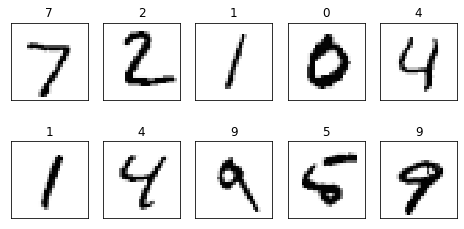

In [193]:
# Predicted
plt.figure(figsize=(8,4))
for iter in range(10):
    
    input_v = np.append(list_image[:,iter],1)
    input_l = list_label[iter]
    
    h_ = input_v.dot(w)
    h = sigmoid(h_)
    
    output_l = np.zeros(10)
    output_l[np.argmax(h)] = 1

    actual_l = np.zeros(10)
    actual_l[input_l] = 1
    print("Predict Output: %d --> Actual Output: %d" % (np.argmax(output_l), np.argmax(actual_l)))

    
    
    label       = list_label[iter]
    im_vector   = list_image[:, iter]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, iter+1)
    plt.title(np.argmax(output_l))
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')
    plt.plot()
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

print()
print('\t\t 10 correctly classified testing images')


Predict Output: 9 --> Actual Output: 5
Predict Output: 1 --> Actual Output: 5
Predict Output: 5 --> Actual Output: 4
Predict Output: 2 --> Actual Output: 9
Predict Output: 2 --> Actual Output: 7
Predict Output: 7 --> Actual Output: 1
Predict Output: 5 --> Actual Output: 0
Predict Output: 4 --> Actual Output: 7
Predict Output: 9 --> Actual Output: 7
Predict Output: 5 --> Actual Output: 0

		 10 correctly misclassified testing images


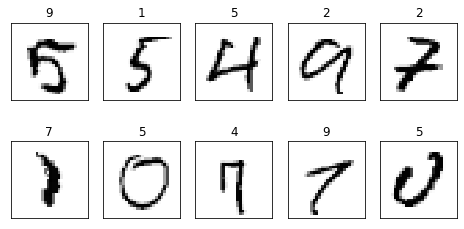

In [194]:
plt.figure(figsize=(8,4))
count = 0

for iter in range(2000,2100):
    
    input_v = np.append(list_image[:,iter],1)
    input_l = list_label[iter]
    
    h_ = input_v.dot(w)
    h = sigmoid(h_)
    
    output_l = np.zeros(10)
    output_l[np.argmax(h)] = 1
        
    actual_l = np.zeros(10)
    actual_l[input_l] = 1
    
    if np.argmax(output_l) != np.argmax(actual_l):
        
        print("Predict Output: %d --> Actual Output: %d" % (np.argmax(output_l), np.argmax(actual_l)))
        im_vector   = list_image[:, iter]
        im_matrix   = im_vector.reshape((size_row, size_col))
    
        plt.subplot(2, 5, count+1)
        plt.title(np.argmax(output_l))
        plt.imshow(im_matrix, cmap='Greys', interpolation='None')
        frame   = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)
        
        count += 1
        
    if count == 10: 
        break

print()
print('\t\t 10 correctly misclassified testing images')














